# **Loading required libraries and packages**

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=806d32165c1bc76d80500a6cf052944723b03385d42e0a1dd1d04db5ff5540b4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [6]:
%matplotlib inline
from ydata_profiling import ProfileReport
import pandas.testing as tm

**f you were using pandas.util.testing for the tm.assert_frame_equal function,Then, you can use tm.assert_frame_equal as before. The pandas.testing module provides similar testing utilities to pandas.util.testing, so you should be able to find the equivalent functions you need.**

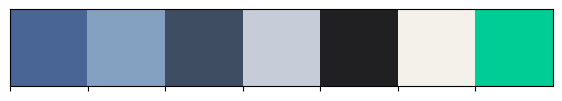

In [7]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

plt.rcParams['axes.facecolor'] = primary_bgcolor

colors = [primary_blue, primary_blue2, primary_blue3, primary_grey, primary_black, primary_bgcolor, primary_green]
sns.palplot(sns.color_palette(colors))

# **Loading Dataset**

In [8]:
data_file_path = "/content/vgsales.csv"
companies_region_path = "/content/video-games-developers.csv"
total_sales_column = "Total_Sales"

In [9]:
data_df = pd.read_csv(data_file_path)
data_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
region_df = pd.read_csv(companies_region_path)
region_df.head()

,Developer,City,Administrative division,Country,Est.,"Notable games, series or franchises",Notes
0,0verflow,Tokyo,NaN,Japan,1997,School DaysSummer DaysCross Days,Visual Novel brand (both developer and publisher)
1,11 bit studios,Warsaw,Masovian Voivodeship,Poland,2010,Frostpunk,Indie developer/publisher
2,1C Company,Moscow,NaN,Russia,1991,King's Bounty: Warriors of the North,Game localization. The game development subsid...
3,1-Up Studio,Tokyo,NaN,Japan,2000,Mother 3,Subsidiary of Nintendo. Formed by former emplo...
4,2K Czech,Brno,NaN,Czech Republic,1997,MafiaMafia II,Former subsidiary of 2K Games; previously know...


In [11]:
df = pd.merge(data_df, region_df[['Developer','City']], left_on = 'Publisher', right_on = 'Developer', how = 'left') #Creating dataset by merging both the data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,City
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,Kyoto
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,Kyoto
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Kyoto
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,Kyoto
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,Kyoto


In [12]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer',
       'City'],
      dtype='object')

# **Pandas Profiling**

In [13]:
vgames_profile = ProfileReport(df, title = 'Video Games Profile Report')

In [14]:
vgames_profile

Output hidden; open in https://colab.research.google.com to view.

# **Released games by year**

In [15]:
#Creating Total_Sales column
if 'Total_Shipped' in df.columns:
  df[total_sales_column] = df[Total_Shipped].fillna(0) + df['Global_Sales'].fillna(0)
else:
  regions = ['NA', 'JP', 'EU', 'Other']
  region_sales_sufix = '_Sales'

  df[total_sales_column] = df['Global_Sales']


In [16]:
tdf = df.copy() #Creating a temp dataset

tdf = df[df['Year'].notna()] #removing the rows with null values
tdf = tdf.sort_values('Year', ascending = True) #Sorting remaiing rows in ascending order

In [17]:
#Plotting histogram showing the count of sales of different platform over the years.
fig = px.histogram(
    tdf,
    x='Platform',
    animation_frame='Year',
    range_y=[0, 550],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [18]:
#Plotting graph to show top platforms from year 2005-2012.
top_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: 'count'}).reset_index()
top_tdf.columns = ['Platform', 'Year', 'Count']
top_tdf = top_tdf[top_tdf['Year'].isin([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])]
top_tdf = top_tdf[top_tdf['Count'] > top_tdf['Count'].sum() * 0.01]
top_tdf['Year'] = top_tdf['Year'].astype(str)

In [19]:
fig = px.bar(
    top_tdf,
    x='Platform',
    y='Count',
    color='Year',
    barmode="group"
)
fig.update_layout(title="Total released video-games by platform")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [20]:
top_tdf.head()


,Platform,Year,Count
12,3DS,2011.0,116
13,3DS,2012.0,93
27,DS,2005.0,118
28,DS,2006.0,202
29,DS,2007.0,377


In [21]:
#Identifying top 5 platforms for the years 2005-2012
top_counts_platform = top_tdf.groupby('Platform').agg({'Count': 'sum'}).reset_index()
top_counts_platform = top_counts_platform.sort_values('Count', ascending=False).head(5)

print(top_counts_platform)


  Platform  Count
1       DS   2073
8      Wii   1192
7      PSP   1115
9     X360   1029
5      PS2   1020


In [22]:
platform_tops = ['DS','Wii','PSP','X360','PS2']

# **Sales Analysis**

In [23]:
#Calculating total sales of different platforms over the years.
platform_tdf = tdf.groupby(['Platform', 'Year']).agg({total_sales_column: 'sum'}).reset_index()
platform_tdf = platform_tdf.sort_values('Year', ascending=True)
platform_tdf.head()

,Platform,Year,Total_Sales
0,2600,1980.0,11.38
1,2600,1981.0,35.77
2,2600,1982.0,28.86
3,2600,1983.0,5.83
79,NES,1983.0,10.96


In [24]:
fig = px.bar(
    platform_tdf,
    x='Platform',
    y=total_sales_column,
    animation_frame='Year',
    range_y=[0, 150],
)
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

In [25]:
#Plotting sales from the top selling years
platform_top_tdf = platform_tdf[platform_tdf['Year'].isin([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])]
platform_top_tdf = platform_top_tdf[platform_top_tdf[total_sales_column] > platform_top_tdf[total_sales_column].sum() * 0.005]
platform_top_tdf['Year'] = platform_top_tdf['Year'].astype(str)

fig = px.bar(
    platform_top_tdf,
    x='Platform',
    y=total_sales_column,
    color='Year',
    barmode="group"
)
fig.update_layout(title="Total sales by platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

## Aggregated sales analysis

In [26]:
# calculating agg sales of important platforms
platform_sum_tdf = platform_tdf.groupby(['Platform']).agg({total_sales_column: 'sum'}).reset_index()
platform_sum_tdf = platform_sum_tdf[platform_sum_tdf[total_sales_column] > platform_sum_tdf[total_sales_column].sum() * 0.03]

In [27]:
fig = px.bar(
    platform_sum_tdf,
    x='Platform',
    y=total_sales_column,
)
fig.update_layout(title="Total sales of all time in the most important platforms (Millions)")
fig.update_xaxes(type='category')
fig.update_xaxes(categoryorder='category ascending')
fig.show()

# **Sales distribution**

In [28]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer,City,Total_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,Kyoto,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,Kyoto,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Kyoto,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,Kyoto,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,Kyoto,31.37


In [29]:
# Calculating sales data for different regions.
if 'Total_Shipped' in df.columns:
    regions = ['NA', 'JP', 'PAL', 'Other']
else:
    regions = ['NA', 'JP', 'EU', 'Other']

region_sales_sufix = '_Sales'
regions_agg = {}

for region in regions:
    regions_agg[region + region_sales_sufix] = 'sum'

regions_agg[total_sales_column] = 'sum'
regions_agg

{'NA_Sales': 'sum',
 'JP_Sales': 'sum',
 'EU_Sales': 'sum',
 'Other_Sales': 'sum',
 'Total_Sales': 'sum'}

In [30]:
geo_tdf = tdf.groupby(['Year']).agg(regions_agg).reset_index()
geo_tdf = geo_tdf.sort_values('Year', ascending=True)
geo_tdf.head(10)

,Year,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Total_Sales
0,1980.0,10.59,0.00,0.67,0.12,11.38
1,1981.0,33.40,0.00,1.96,0.32,35.77
2,1982.0,26.92,0.00,1.65,0.31,28.86
3,1983.0,7.76,8.10,0.80,0.14,16.79
4,1984.0,33.28,14.27,2.10,0.70,50.36
5,1985.0,33.73,14.56,4.74,0.92,53.94
6,1986.0,12.50,19.81,2.84,1.93,37.07
7,1987.0,8.46,11.63,1.41,0.20,21.74
8,1988.0,23.87,15.76,6.59,0.99,47.22
9,1989.0,45.15,18.36,8.44,1.50,73.45


In [31]:
fig = go.Figure()

for region in regions:

    fig.add_trace(go.Scatter(
        x=geo_tdf['Year'],
        y=geo_tdf[region + region_sales_sufix],
        mode='lines',
        name=region,
    ))
fig.update_layout(title="Total sales per year by region (Millions)")
fig.update_xaxes(type='category')
fig.show()

In [32]:
year_geo_df = tdf[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
year_geo_df[['NA_mean','EU_mean','JP_mean','Other_mean']] = year_geo_df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
year_geo_df = year_geo_df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis = 1)
year_geo_df = year_geo_df.drop_duplicates()
year_geo_df = year_geo_df.sort_values("Year")


temp_df1 = pd.DataFrame({'Place':['NA_Sales'] * year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['NA_mean']})
temp_df2 = pd.DataFrame({'Place':['EU_Sales'] * year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['EU_mean']})
temp_df3 = pd.DataFrame({'Place':['JP_Sales'] * year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['JP_mean']})
temp_df4 = pd.DataFrame({'Place':['Other_Sales'] * year_geo_df.shape[0], 'Year': year_geo_df['Year'], 'Sales': year_geo_df['Other_mean']})

final = pd.concat([temp_df1, temp_df2, temp_df3, temp_df4], axis = 0)
final = final.sort_values('Year')

fig = px.bar(
    final,
    x = 'Place',
    y = 'Sales',
    animation_frame = 'Year',
    animation_group = 'Place',
    color = 'Place',
    hover_name = 'Place',
    range_y = [0, 200]

)

fig.update_layout(title="Year sales distribution by region", title_x=0.5)

fig.show()


# **Distribution of sales by genre**

In [33]:
genre_tdf = tdf.groupby(['Genre']).agg(regions_agg)
genre_tdf = genre_tdf.sort_values(total_sales_column, ascending=False)
genre_tdf.head()

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,861.80,158.66,516.48,184.92,1722.88
Sports,670.09,134.76,371.34,132.65,1309.24
Shooter,575.16,38.18,310.45,101.90,1026.20
Role-Playing,326.50,350.29,187.58,59.38,923.84
Platform,445.99,130.65,200.67,51.51,829.15


## Distribution of sales by genre and region

In [35]:
#Plotting heatmap of sales by region and genre.
fig = px.imshow(genre_tdf.drop(columns=[total_sales_column]).T)
fig.update_layout(title="Sales distribution by genre and region (Millions)")
fig.show()

In [43]:
# Plotting scatter plot for total sales as per genre
genre_total_tdf = genre_tdf.reset_index().sort_values(total_sales_column, ascending=False)

In [44]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=genre_total_tdf['Genre'],
    y=genre_total_tdf[total_sales_column],
    mode='lines+markers',
))
fig.update_layout(title="Total sales by genre (Millions)")
fig.update_xaxes(type='category')
# fig.update_xaxes(categoryorder='total descending')
fig.show()

## Sales Distribution in the years with most sales

In [36]:
genre_top_tdf = tdf[tdf['Year'].isin([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])]
genre_top_tdf = genre_top_tdf.groupby(['Genre']).agg(regions_agg)
genre_top_tdf = genre_top_tdf.sort_values(total_sales_column, ascending=False)
genre_top_tdf.head()

,NA_Sales,JP_Sales,EU_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,457.45,67.88,261.36,105.93,893.16
Sports,369.56,47.09,207.71,83.84,708.21
Misc,287.75,63.29,150.14,59.16,560.69
Shooter,291.66,14.06,163.12,61.05,530.04
Role-Playing,166.93,128.55,80.88,33.08,409.60


In [39]:
fig = px.imshow(genre_top_tdf.drop(columns=[total_sales_column]).T)
fig.update_layout(title="Sales distribution by genre and region (Millions) for the years with most sales")
fig.show()

In [46]:
#Plotting scatter plot of sales by genre for the years with most sales.
genre_top_total_tdf = genre_top_tdf.reset_index().sort_values(total_sales_column, ascending=False)

In [47]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=genre_top_total_tdf['Genre'],
    y=genre_top_total_tdf[total_sales_column],
    mode='lines+markers',
))
fig.update_layout(title="Total sales by genre (Millions) for years with most sales")
fig.update_xaxes(type='category')

fig.show()